In [17]:

import mysql.connector

cnx = mysql.connector.connect(user='root', password='root',
                              host='127.0.0.1',
                              database='sprint4')



Exercici 1: Realitzem un gràfic de densitat del Amount a través de la llibreria de seaborn, aquest en la majoria de casos està comprés entre 50 i 450$

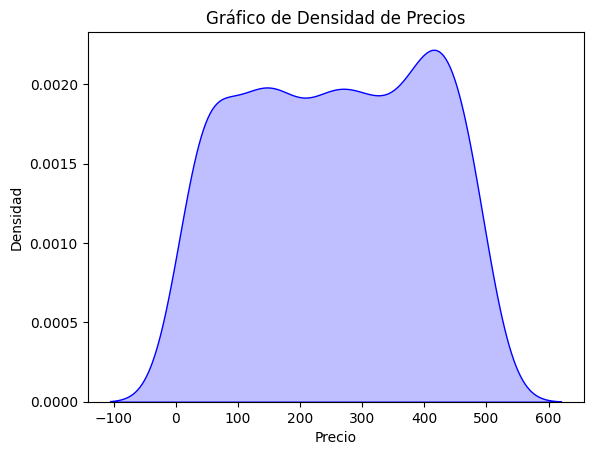

In [4]:
# Exercici 1 una variable numèrica
import seaborn as sns
import matplotlib.pyplot as plt

query = """
select amount as Amount
from transactions;"""

# Llegeix les dades de la consulta SQL
data = pd.read_sql(query, cnx)

# Extreu dades per a la gràfica
x = data['Amount']

# Crear el gráfico de densidad
sns.kdeplot(x, shade=True, color="blue")

# Añadir títulos y etiquetas
plt.title('Gráfico de Densidad de Amount')
plt.xlabel('Amount')
plt.ylabel('Densidad')

# Mostrar el gráfico
plt.show()

Exercici 2: realitzem un gràfic de barres amb matplotlib dels 10 màxims amounts, observem una gran variació de més de 17500 $ disminueïx fins als 1500 $ (No hem deixa moure els exercicis per aixó estàn desordenats)

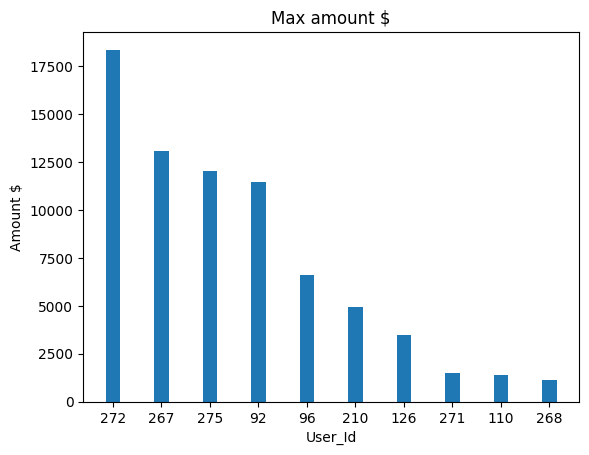

In [1]:
# Exercici 2 Dues variables numèriques.
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# Ignorar advertències
warnings.filterwarnings('ignore')

# Paràmetres de connexió
import mysql.connector

cnx = mysql.connector.connect(user='root', password='root',
                              host='127.0.0.1',
                              database='sprint4')


# Connexió a la base de dades
query = """
select user_id, sum(amount) as am
from transactions
group by user_id
order by am desc
limit 10;
"""

# Llegeix les dades de la consulta SQL
data = pd.read_sql(query, cnx)

# Extreu dades per a la gràfica
x = data['user_id']
y = data['am']

# Crea la gràfica de barres
plt.bar(x, y, width=0.3)

# Etiquetes i títol
plt.ylabel('Amount $')
plt.xlabel('User_Id')
plt.title('Max amount $')

# Mostra la gràfica
plt.show()


Exercici 3: En aquets exercici observem la quantitat d'empreses que hi ha a cada país, tenint poca representativitat d'Espanya, China i França

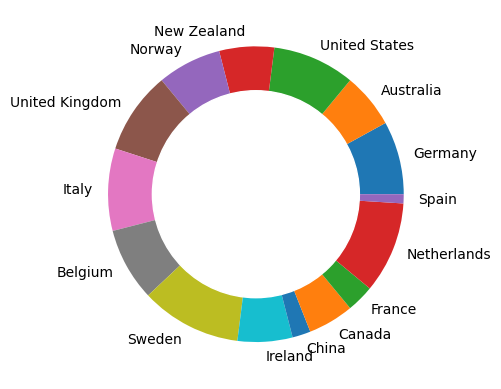

In [11]:
# Exercici 3 Una variable categòrica


query = """
select country, count(country) as num from companies
group by country;"""

# Llegeix les dades de la consulta SQL
data = pd.read_sql(query, cnx)

# create data
names = (data['country'])
size = (data['num'])
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Give color names
plt.pie(size, labels=names)
p = plt.gcf()
p.gca().add_artist(my_circle)

# Show the graph
plt.show()

Exercici 4: Escollim dues variables una numérica, el recompte dels usuaris i una categórica el país d'on son, i representem les proporcions en un gràfic de donut on veiem que la majoria són d'USA.

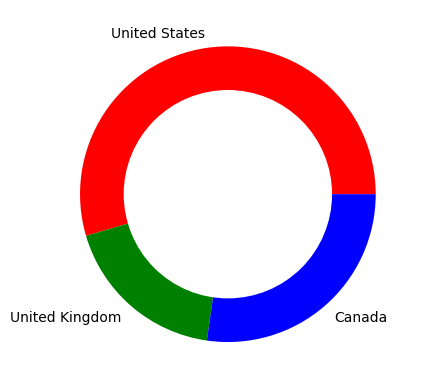

In [4]:
#Exercici 4 Una variable categòrica i una numèrica.

# library
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# Ignorar advertències
warnings.filterwarnings('ignore')

# Paràmetres de connexió
import mysql.connector

cnx = mysql.connector.connect(user='root', password='bernat1714',
                              host='127.0.0.1',
                              database='sprint4')

query = """
select count(id) as usuaris, country from users
group by country;"""

# Llegeix les dades de la consulta SQL
data = pd.read_sql(query, cnx)

# create data
names = (data['country'])
size = (data['usuaris'])
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Give color names
plt.pie(size, labels=names, colors=['red','green','blue'])
p = plt.gcf()
p.gca().add_artist(my_circle)

# Show the graph
plt.show()

Exercici 5: Classifiquem les ciutats per país amb un treemap observem aquelles amb el nom més gran el seu count d'usuaris també ho és

In [1]:
# Exercici 5 Dues variables categòriques.
import pandas as pd
import plotly.express as px
import sqlite3

# Conectar a la base de datos SQLite (ajusta esto según tu base de datos real)
import mysql.connector

cnx = mysql.connector.connect(user='root', password='bernat1714',
                              host='127.0.0.1',
                              database='sprint4')

# Consulta SQL para contar la cantidad de usuarios por ciudad y país
query = """
SELECT country, city, COUNT(id) as user_count
FROM users
GROUP BY country, city
"""

# Leer datos de la consulta SQL en un DataFrame de pandas
df = pd.read_sql_query(query, cnx)


# Crear el treemap con plotly
fig = px.treemap(df, path=['country', 'city'], values='user_count',
                 title='Distribución de Usuarios por Ciudad y País')

# Mostrar el treemap
fig.show()


C:\Users\PC\AppData\Local\Temp\ipykernel_5672\895291832.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, cnx)


Exercici 6:  Classifiquem els usuaris en dues variables categóriques el país, la ciutat i una numerica la quantitat d'usuaris, mostrem quan hi ha més de dos usuaris en aquesta ciutat. Tenint 6 ciutats a Canda amb 2 usuaris i 2 amb 3 usuaris.

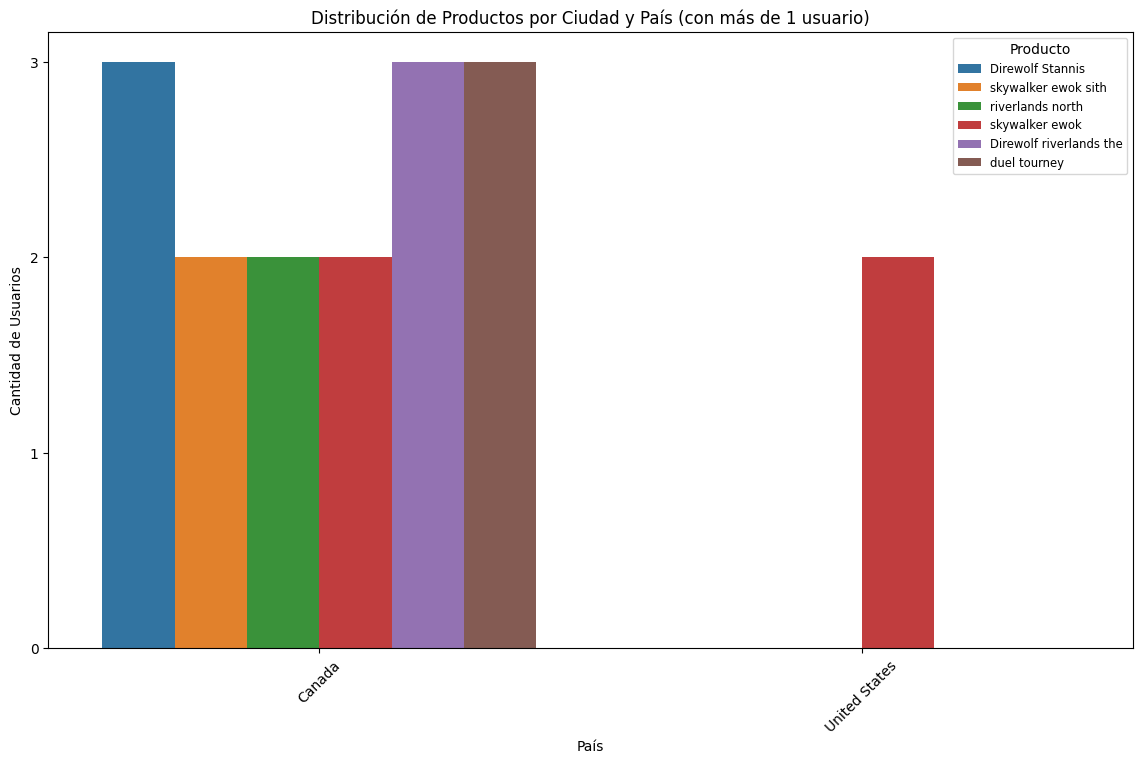

In [29]:
# Exercici 6 Tres variables.
query = """
SELECT u.country, u.city, p.product_name, COUNT(u.id) as user_count
FROM users u
JOIN transactions t ON u.id = t.user_id
JOIN products1 p ON p.id = t.product_ids
GROUP BY u.country, u.city, p.product_name
HAVING COUNT(u.id) > 1
"""

# Leer datos de la consulta SQL en un DataFrame de pandas
df = pd.read_sql_query(query, cnx)


# Crear el gráfico de barras apiladas con seaborn
plt.figure(figsize=(14, 8))
sns.barplot(data=df, x='country', y='user_count', hue='product_name', ci=None)

# Añadir títulos y etiquetas
plt.title('Distribución de Productos por Ciudad y País (con más de 1 usuario)')
plt.xlabel('País')
plt.ylabel('Cantidad de Usuarios')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si es necesario

# Ajustar el tamaño de la fuente de la leyenda
plt.legend(title='Producto', fontsize='small', title_fontsize='medium')

# Configurar los ticks del eje y para mostrar solo los valores enteros sin los intermedios
y_max = df['user_count'].max()
plt.yticks(ticks=range(0, y_max + 1))

# Mostrar el gráfico
plt.show()

 Exercici 7 Grafiquem un Pairplot de diferents variables com la latitud, longitud, amount i age.

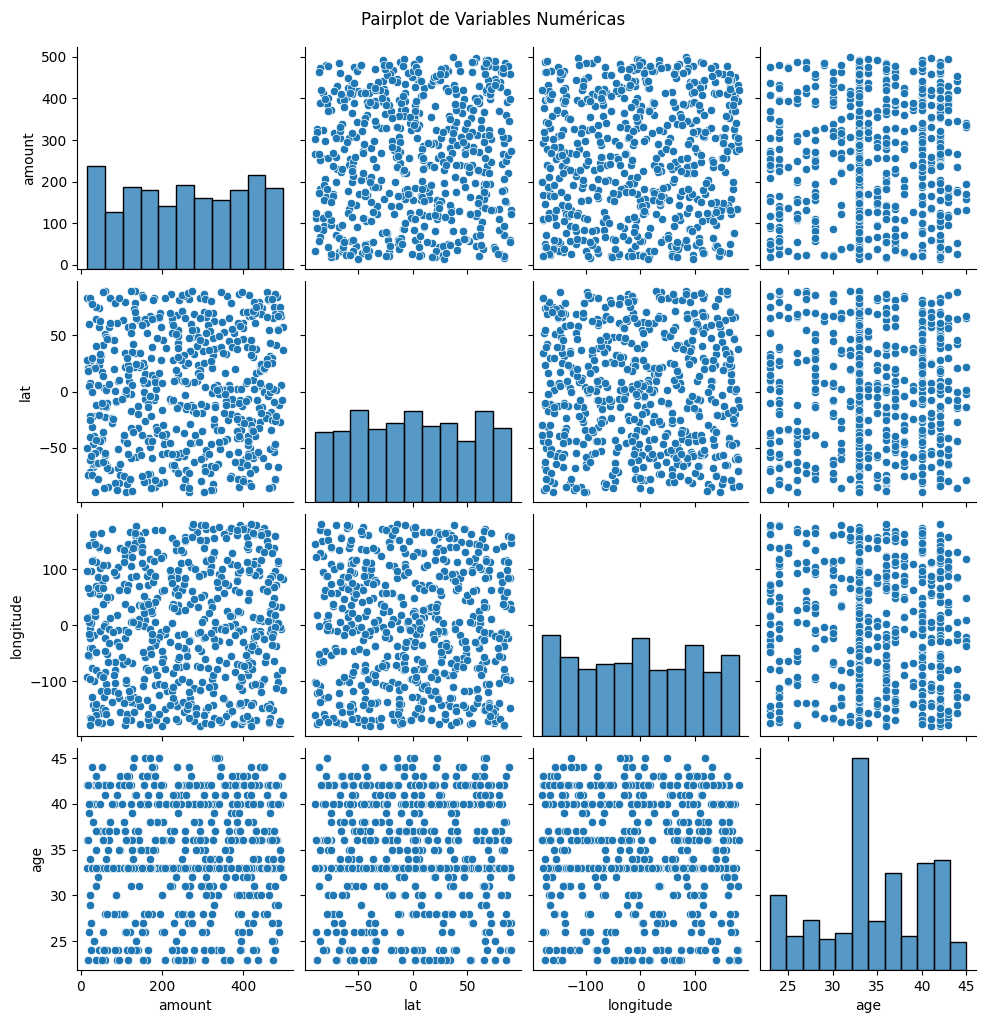

In [32]:
# Exercici 7 Graficar un Pairplot.
from datetime import datetime

query = """
SELECT t.amount, t.lat, t.longitude, u.birth_date
FROM transactions t
JOIN users u ON t.user_id = u.id
WHERE t.amount IS NOT NULL AND t.lat IS NOT NULL AND t.longitude IS NOT NULL
"""

# Leer datos de la consulta SQL en un DataFrame de pandas
df = pd.read_sql_query(query, cnx)


# Convertir la columna 'birth_date' a tipo datetime
df['birth_date'] = pd.to_datetime(df['birth_date'], errors='coerce')

# Filtrar filas con fechas de nacimiento nulas
df.dropna(subset=['birth_date'], inplace=True)

# Calcular la edad
current_year = datetime.now().year
df['age'] = current_year - df['birth_date'].dt.year

# Filtrar cualquier fila con valores nulos en las nuevas columnas
df.dropna(inplace=True)

# Crear el pairplot con seaborn
sns.pairplot(df[['amount', 'lat', 'longitude', 'age']])
plt.suptitle('Pairplot de Variables Numéricas', y=1.02)

# Mostrar el gráfico
plt.show()